In [12]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 142us/step - loss: 0.2600 - acc: 0.9246
Epoch 2/3
60000/60000 [==============================] - 7s 111us/step - loss: 0.1039 - acc: 0.9680
Epoch 3/3
60000/60000 [==============================] - 7s 114us/step - loss: 0.0721 - acc: 0.9772


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 48us/step
0.09526056866813451 0.97


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

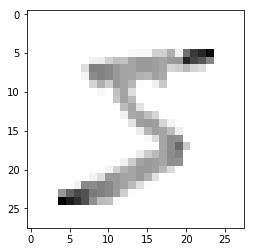

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show
print(x_train[0])

In [15]:
model.save('epic_num_reader.model')

In [16]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [17]:
predictions = new_model.predict([x_test])

In [18]:
print(predictions)

[[1.1075304e-08 4.4552081e-08 4.8459174e-06 ... 9.9998879e-01
  1.6074912e-07 1.3082935e-06]
 [1.6929006e-08 2.9734108e-05 9.9996769e-01 ... 1.0920956e-08
  1.9204419e-08 2.3057346e-12]
 [1.9164565e-07 9.9962747e-01 7.8224948e-05 ... 4.0893261e-05
  1.9245384e-04 6.1511469e-07]
 ...
 [1.7644007e-08 6.1963414e-07 7.2103699e-06 ... 1.5868633e-05
  3.7633064e-05 4.5550262e-04]
 [2.3263254e-07 5.2427299e-07 2.4465837e-07 ... 1.0478413e-07
  4.8355218e-03 5.4191537e-07]
 [2.2808892e-06 1.0627483e-06 2.0175105e-05 ... 7.6385032e-10
  4.5806769e-07 3.6309020e-09]]


In [21]:
import numpy as np

print(np.argmax(predictions[1]))

2


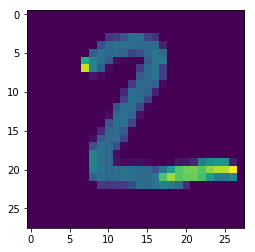

In [23]:
plt.imshow(x_test[1])
plt.show()